## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Understanding

In [2]:
#load the csv data to a pandas dataframe

df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
# First 5 rows of the dataset

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Last 5 rows of the dataset

df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
#number of row and columns

df.shape

(5572, 5)

The dataset contains 5572 rows and 5 columns.

In [6]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Thats show you the missing values in the dataset and what are all the different data types inthe different columns

In [7]:
#check for duplicate values

df.duplicated().sum()

403

In [8]:
#remove duplicates

df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
#Number of row and columns

df.shape

(5169, 5)

In [11]:
# Checking the number of missing values in each column of the dataset

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

* v1, v2 -These columns have 0 missing values, meaning all the rows in these columns have a value.
* Unnamed: 2 ,Unnamed: 3,Unnamed: 4 -This column has 5522 missing values.

## Data Cleaning and EDA

In [12]:
# Drop last 3 columns

df.drop (columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

Unnamed: 2 ,Unnamed: 3,Unnamed: 4 column as this is not requrired for modeling

In [13]:
# First 5 rows of the dataset

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Renaming the colimns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [15]:
df.sample(5)

,target,text
1431,ham,My painful personal thought- \I always try to ...
223,ham,U say leh... Of course nothing happen lar. Not...
2489,ham,I have 2 docs appointments next week.:/ I'm ti...
3144,ham,I.ll get there tomorrow and send it to you
1319,ham,Correct. So how was work today


In [16]:
#from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [17]:
# Checking the class distribution of the target column

df['target']=encoder.fit_transform(df['target'])

In [18]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32

* Ham ---> 0
* Sapm --->1

In [19]:
# First 5 rows of the dataset

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


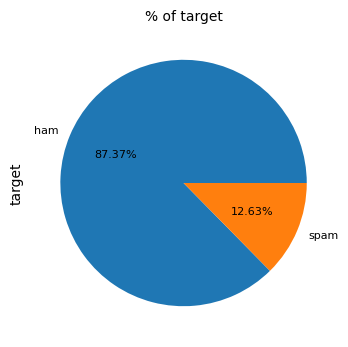

In [20]:
df['target'].value_counts().plot(kind='pie',autopct='%.2f%%',
                                 labels = ['ham', 'spam'],
                                 figsize =(4,4), fontsize = 8 
                                 )
plt.ylabel('target')
plt.title('% of target', fontsize = 10)
plt.show()

This Dataset is highly unblanced
* Ham-->87.37%
* spam-->12.63%

In [21]:
# The len() function counts the number of characters

df['num_characters']=df['text'].apply(len)

In [22]:
# First 5 rows of the dataset

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# Extract number of word using word_tokenize

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
# First 5 rows of the dataset

df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# The len() function then counts the number of sentences

df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
# First 5 rows of the dataset

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


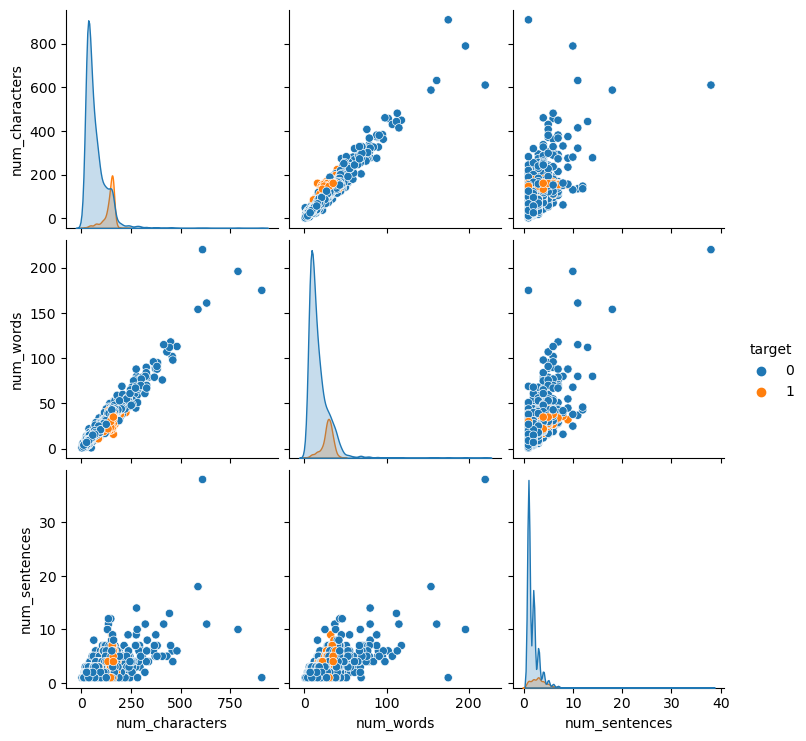

In [27]:
# Creating a pairplot using Seaborn to visualize pairwise relationships between numerical features

sns.pairplot(df,hue='target')

#### Compar the ham and spam

In [28]:
# for non-spam (target == 0) emails based on numerical features:

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# Generating summary statistics for spam emails (target == 1) 

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

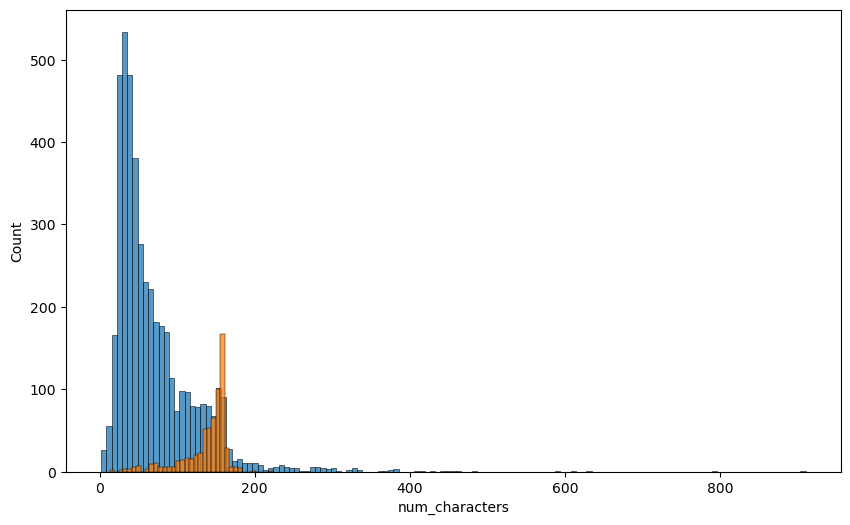

In [30]:
# Plotting the distribution of 'num_characters' for both target classes  

plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

* The 'ham' SMS messages tend to have a very low number of characters, while the 'spam' SMS messages tend to have a very high number of characters.

<Axes: xlabel='num_words', ylabel='Count'>

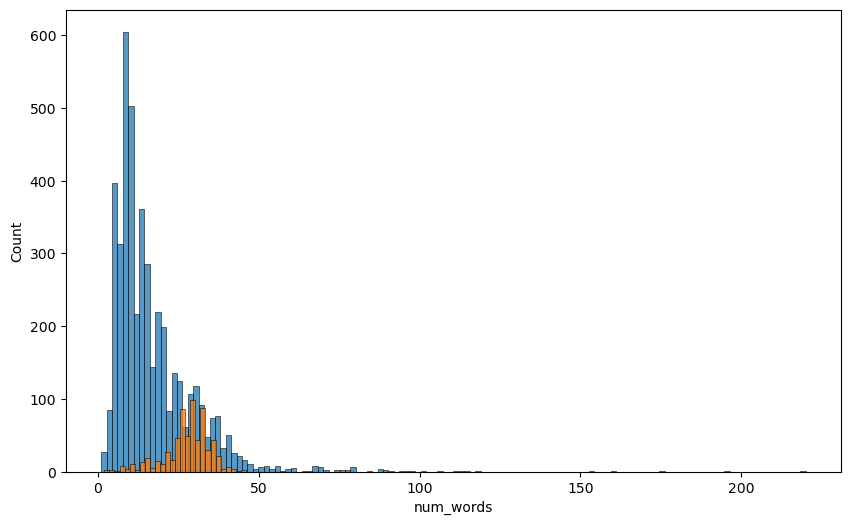

In [31]:
# Plotting the distribution of 'num_words' for both target classes  

plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

* The 'ham' SMS messages tend to have a very low number of words, while the 'spam' SMS messages tend to have a very high number of words.

###  Correlation

In [32]:
numerical_colums=df[['target','num_characters','num_words','num_sentences']]

numerical_colums.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

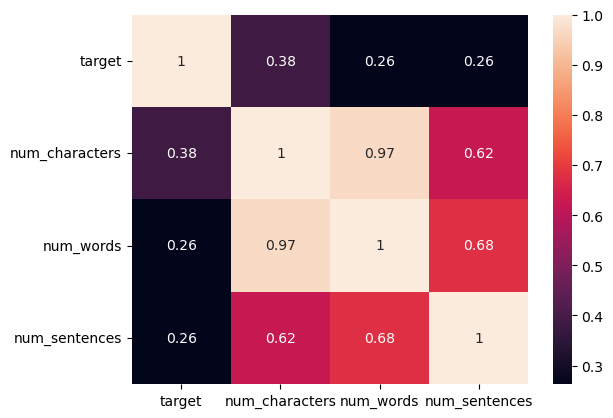

In [33]:
sns.heatmap(numerical_colums.corr(),annot=True)

* It helps you identify potential predictors for your target variable and understand how different features relate to each other.  However, further analysis and domain knowledge are necessary to draw definitive conclusions.

### Text Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and Punctuation
* stemming

In [34]:
def transform_text(text):
    text = text.lower() #lower case
    text=nltk.word_tokenize(text) # Tokenization
    
    y=[] #Removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]      # Removing stop
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    
    text= y[:]   #stemming
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    
    return " " .join(y)

In [35]:
# Transforming 'text' column and storing in 'transformed_text'  

df['transformed_text']=df['text'].apply(transform_text)

In [36]:
# First 5 rows of the dataset

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


###  wordcloud

In [37]:
from wordcloud import WordCloud

In [38]:
# Creating a WordCloud with size, font, and white background

wc=WordCloud(width=500,height=500,min_font_size=5,background_color='white')

#### Spam messages

In [39]:
# Generating a word cloud for spam messages using transformed text

spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

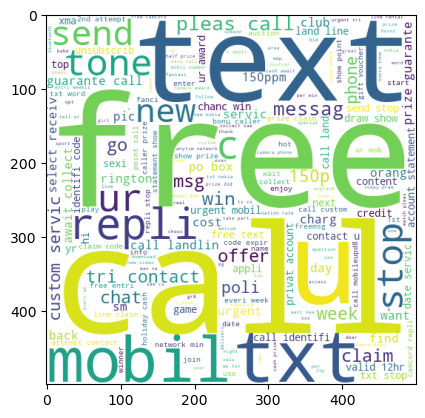

In [40]:
plt.imshow(spam_wc)

In [41]:
#  Extracting all words from spam messages into a list

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
# Counting the total number of words in all spam messages

len(spam_corpus)

9939

In [43]:
# Importing Counter to count word frequencies

from collections import Counter

In [44]:
# Getting the top 10 most common spam words

spam_common_words=Counter(spam_corpus).most_common(20)[:10]

In [45]:
# Displaying the most common spam words and their frequencies

spam_common_words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [46]:
# Creating a DataFrame for visualization

spam_word= pd.DataFrame(spam_common_words, columns=["Word", "Frequency"])

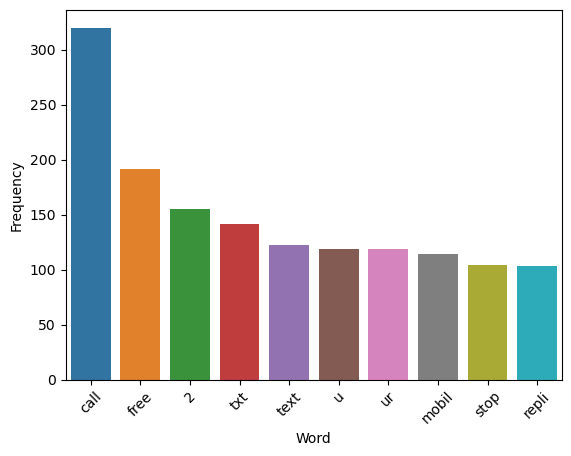

In [47]:
# Plotting a bar chart of common spam words

sns.barplot(x="Word", y="Frequency", data=spam_word)
plt.xticks(rotation=45)
plt.show()

#### Ham messages

In [48]:
# # Generating a word cloud for ham messages using transformed text

ham_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

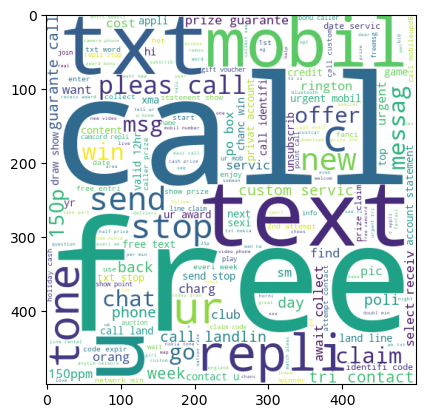

In [49]:
plt.imshow(ham_wc)

In [50]:
#  Extracting all words from ham messages into a list

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
# Counting the total number of words in all ham messages

len(ham_corpus)

35404

In [52]:
# Getting the top 10 most common ham words

ham_common_words=Counter(ham_corpus).most_common(20)[:10]

In [53]:
# Creating a DataFrame for visualization

ham_word= pd.DataFrame(ham_common_words, columns=["Word", "Frequency"])

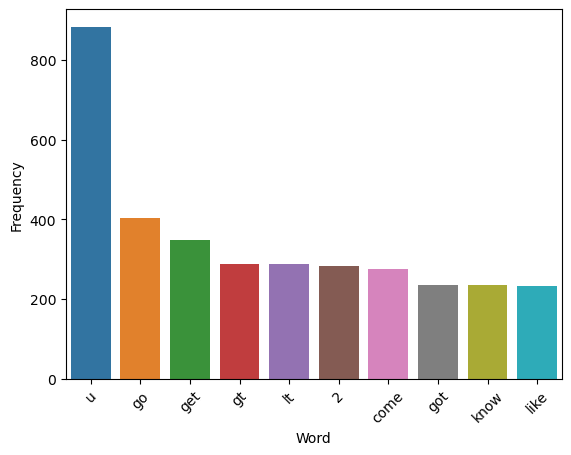

In [54]:
# Plotting a bar chart of common spam words

sns.barplot(x="Word", y="Frequency", data=ham_word)
plt.xticks(rotation=45)
plt.show()

## Model Building

In [55]:
# TEXT VECTORIZATION
# using TDF IDF

In [56]:
# Converting text to numerical features using TF-IDF  

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [57]:
# Transforming text data into a TF-IDF matrix  

x=tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
# Checking the shape of the TF-IDF feature matrix (messages, unique words) 

x.shape  

(5169, 6708)

In [59]:
# Extracting the target variable (spam or ham)

y=df['target']

In [60]:
# Checking the shape of the target variable

y.shape

(5169,)

## Divide data into two parts: test and train.

In [61]:
#from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split (x,y,test_size=0.3,random_state=2)

### 1) MultinomialNB

In [62]:
#from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()

In [63]:
mnb.fit(x_train,y_train)

y_pred2=mnb.predict(x_test)

In [64]:
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9555125725338491
[[1360    0]
 [  69  122]]
1.0


In [65]:
# from sklearn.metrics import classification_report

classification=classification_report(y_test,y_pred2)
print(classification)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1360
           1       1.00      0.64      0.78       191

    accuracy                           0.96      1551
   macro avg       0.98      0.82      0.88      1551
weighted avg       0.96      0.96      0.95      1551



### 2) BernoulliNB

In [66]:
# from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()

In [67]:
bnb.fit(x_train,y_train)

y_pred3=bnb.predict(x_test)

In [68]:
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9696969696969697
[[1356    4]
 [  43  148]]
0.9736842105263158


In [69]:
# from sklearn.metrics import classification_report

classification=classification_report(y_test,y_pred3)
print(classification)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.97      0.77      0.86       191

    accuracy                           0.97      1551
   macro avg       0.97      0.89      0.92      1551
weighted avg       0.97      0.97      0.97      1551



### Improve performance using multiple algorithms

In [70]:
#from sklearn.linear_model import LogisticRegression

#from sklearn.svm import SVC

#from sklearn.ensemble import RandomForestClassifier

#from xgboost import XGBClassifier


In [71]:
lr=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
rf=RandomForestClassifier(n_estimators=50,random_state=2)
xgb=xgb=XGBClassifier(n_estimators=60,random_state=2)

In [72]:
clfs={
    'lr':lr,
    'svc':svc,
    'rf':rf,
    'xgb':xgb
}

In [73]:
def train_classifier(clfs,x_train,y_train,x_test,y_test):
    clfs.fit(x_train,y_train)
    y_pred=clfs.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [74]:
train_classifier(lr,x_train,y_train,x_test,y_test) #[acc=94,pre=92]

(0.9490651192778853, 0.9242424242424242)

In [75]:
from sklearn.metrics import accuracy_score, precision_score

# Initialize empty lists for storing scores
accuracy_scores = []
precision_scores = []

# Iterate through classifiers
for name, clf in clfs.items():
    # Train the classifier and get metrics
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    # Print the results
    print("For", name)
    print("Accuracy- ", current_accuracy)
    print("Precision- ", current_precision)
    
    # Append scores to the lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For lr
Accuracy-  0.9490651192778853
Precision-  0.9242424242424242
For svc
Accuracy-  0.9742101869761445
Precision-  0.9748427672955975
For rf
Accuracy-  0.9722759509993553
Precision-  0.9933333333333333
For xgb
Accuracy-  0.9658284977433914
Precision-  0.9367088607594937


In [76]:
# Creating and sorting a DataFrame of algorithm performance (Accuracy & Precision) 

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
2,rf,0.972276,0.993333
1,svc,0.974210,0.974843
3,xgb,0.965828,0.936709
0,lr,0.949065,0.924242


In [78]:
import pickle

# Save the TF-IDF vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Save the trained model
pickle.dump(mnb, open('model.pkl', 'wb'))